In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('churn.csv')
df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


1. Построить гистограмму количества звонков в техническую поддержку

<AxesSubplot:>

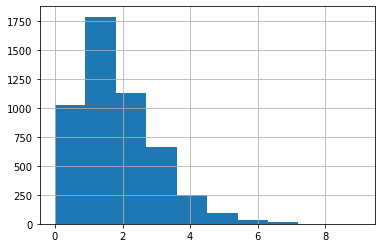

In [6]:
df.number_customer_service_calls.hist()

2. Рассчитать и построить гистограмму общей длительности звонков клиента (дневных + ночных + вечерних + международны)

In [9]:
df['Total_duration'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes'] + df['total_intl_minutes']

In [19]:
df.head(60)

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned,Total_duration
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,717.2
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,625.2
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,539.4
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,564.8
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,512.0
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,18.75,203.9,118,9.18,6.3,6,1.70,0,False,654.2
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,29.62,212.6,118,9.57,7.5,7,2.03,3,False,786.8
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,8.76,211.8,96,9.53,7.1,6,1.92,0,False,479.0
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,29.89,215.8,90,9.71,8.7,4,2.35,1,False,760.6
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,18.87,326.4,97,14.69,11.2,5,3.02,0,False,818.2


<AxesSubplot:>

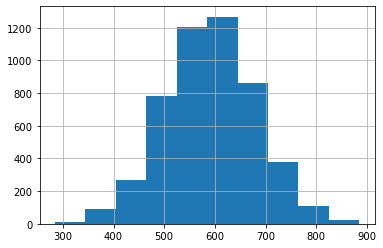

In [11]:
df.Total_duration.hist()

3. Собственноручно (не используя встроенных функций) рассчитать линейный коэффициент корреляции (https://ru.wikipedia.org/wiki/Корреляция) общего количества минут и количества звонков в техподдержку

4. Визуализировать точечный график по общему количеству минут / количеству звонков в поддержку, подкрасив точки в зависимости от оттока абонента

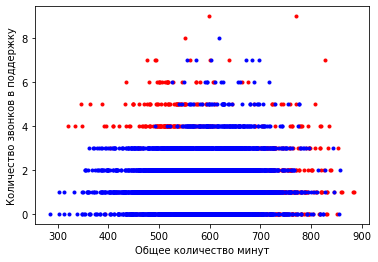

In [26]:
x = df[(df.churned == True)]['Total_duration']
y = df[(df.churned == True)]['number_customer_service_calls']
plt.scatter(x, y, marker='.',color='r')
plt.xlabel('Общее количество минут')
plt.ylabel('Количество звонков в поддержку')

x = df[(df.churned == False)]['Total_duration']
y = df[(df.churned == False)]['number_customer_service_calls']
plt.scatter(x, y, marker='.',color='b')
plt.xlabel('Общее количество минут')
plt.ylabel('Количество звонков в поддержку')
plt.show()

5. Вывести top-5 самых много и самых мало говорящих клиентов

In [13]:
dfi = df.sort_values("Total_duration")

In [16]:
dfi.head(5)

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned,Total_duration
648,WI,131,415,331-3174,no,yes,39,69.1,122,11.75,...,8.61,104.8,94,4.72,9.1,4,2.46,0,False,284.3
1233,IL,48,510,380-5246,no,no,0,128.2,71,21.79,...,4.09,116.3,80,5.23,8.9,3,2.40,0,False,301.5
3779,MN,141,408,362-8044,no,no,0,77.8,123,13.23,...,12.27,75.3,65,3.39,5.7,7,1.54,1,False,303.2
1986,WI,70,415,405-9233,no,no,0,7.9,100,1.34,...,11.59,156.6,89,7.05,12.1,1,3.27,0,False,313.0
992,MI,45,510,375-8934,no,yes,26,91.7,104,15.59,...,12.80,63.3,103,2.85,7.7,5,2.08,1,False,313.3


In [17]:
dfi.tail(5)

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned,Total_duration
4271,MO,103,415,370-4667,no,yes,37,230.7,112,39.22,...,27.15,299.4,77,13.47,7.9,3,2.13,2,False,857.4
4991,AZ,97,510,410-3888,no,no,0,252.6,89,42.94,...,28.93,256.5,67,11.54,8.8,5,2.38,1,True,858.2
3205,MS,111,408,345-3787,no,no,0,294.7,90,50.10,...,25.04,260.1,121,11.70,10.8,3,2.92,1,True,860.2
289,OK,89,510,352-6976,no,no,0,303.9,95,51.66,...,22.18,312.1,89,14.04,5.3,3,1.43,1,True,882.2
985,NY,64,415,345-9140,yes,no,0,346.8,55,58.96,...,21.21,275.4,102,12.39,13.3,9,3.59,1,True,885.0


6. Вывести долю оттока клиентов и среднюю стоимость минуты дневного времени разговора в зависимости от штата

In [33]:
states = list(set(df.state))
for state in states:
   print(state+':\n\nДоля оттока клиентов: ',df[ (df.churned == True) & (df.state == state)].count().values[0]/df[df.state == state].count().values[0]*100,'%',
              '\nСредняя стоимость минуты дневного времени разговора:',sum(df[ (df.state == state)].total_day_charge/df[ (df.state == state)].total_day_minutes)/df[df.state == state].count().values[0],'\n')

GA:

Доля оттока клиентов:  12.048192771084338 % 
Средняя стоимость минуты дневного времени разговора: 0.17000285296030704 

WY:

Доля оттока клиентов:  9.565217391304348 % 
Средняя стоимость минуты дневного времени разговора: 0.170003269363282 

MN:

Доля оттока клиентов:  16.0 % 
Средняя стоимость минуты дневного времени разговора: 0.17000450198197306 

WV:

Доля оттока клиентов:  13.924050632911392 % 
Средняя стоимость минуты дневного времени разговора: 0.1700049491351395 

VT:

Доля оттока клиентов:  9.900990099009901 % 
Средняя стоимость минуты дневного времени разговора: nan 

RI:

Доля оттока клиентов:  7.07070707070707 % 
Средняя стоимость минуты дневного времени разговора: 0.1700044882289804 

HI:

Доля оттока клиентов:  5.813953488372093 % 
Средняя стоимость минуты дневного времени разговора: 0.16999966083809578 

MO:

Доля оттока клиентов:  12.903225806451612 % 
Средняя стоимость минуты дневного времени разговора: 0.17000753921161996 

KS:

Доля оттока клиентов:  18.18181818

7. перевести штат в one-hot формат при помощи pandas-функции get_dummies или удалите колонку, если вы делаете решение на pyspark

In [20]:
dfy = pd.read_csv('churn.csv')

In [21]:
pd.get_dummies(dfy, columns=["state"]).head()

,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,...,0,0,0,0,0,0,0,0,0,0
1,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,...,0,0,0,0,0,0,0,0,0,0
2,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,...,0,0,0,0,0,0,0,0,0,0
3,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,...,0,0,0,0,0,0,0,0,0,0
4,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,...,0,0,0,0,0,0,0,0,0,0


8. Разбить данные на множество для обучения и для проверки, отобрав признаки для обучения модели классификации (убрать номер телефона, код региона, признаки планов + все добавленные аттрибуты)

In [28]:
dfg = pd.read_csv('churn.csv')
dfg.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churned'],
      dtype='object')

In [29]:
df_filtered = dfg[['number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge',
                   'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls']]

In [30]:
df_filtered.head()

,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [121]:
X, y = dfg[['number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge',
                   'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge']], dfg[['churned']]

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import  SVC

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [124]:
X_train.head()

,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge
3036,0,214.8,112,36.52,209.7,104,17.82,164.4,97,7.40,9.4,5,2.54
3513,0,120.1,103,20.42,179.2,132,15.23,127.3,82,5.73,6.3,4,1.70
3558,0,95.3,103,16.20,189.3,116,16.09,238.7,110,10.74,13.6,4,3.67
944,28,167.9,147,28.54,190.7,105,16.21,193.0,103,8.69,9.2,6,2.48
1429,38,209.8,130,35.67,196.6,84,16.71,233.0,79,10.49,7.0,7,1.89


In [125]:
y_train.head()

,churned
3036,False
3513,False
3558,False
944,True
1429,False


9. Привести данные к одному масштабу при помощи StandardScaler в случае Pandas.

In [126]:
from sklearn.preprocessing import StandardScaler

In [127]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [128]:
X_train

array([[-0.57386344,  0.65124398,  0.60421738, ..., -0.30760088,
         0.22435573, -0.30566186],
       [-0.57386344, -1.09493966,  0.15392496, ..., -1.42766046,
        -0.17807607, -1.42983693],
       [-0.57386344, -1.55222956,  0.15392496, ...,  1.2098992 ,
        -0.17807607,  1.20662127],
       ...,
       [-0.57386344,  1.8368787 ,  1.20460727, ..., -0.27146992,
         2.63894651, -0.26551275],
       [-0.57386344, -0.83126039,  0.20395745, ..., -0.30760088,
        -0.58050787, -0.30566186],
       [-0.57386344, -0.98061718,  0.10389247, ..., -0.30760088,
        -0.98293967, -0.30566186]])

In [129]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [130]:
X_train.head()

,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge
0,-0.573863,0.651244,0.604217,0.651620,0.188790,0.190427,0.187707,-0.720635,-0.143583,-0.719785,-0.307601,0.224356,-0.305662
1,-0.573863,-1.094940,0.153925,-1.094671,-0.408818,1.598386,-0.409329,-1.461976,-0.895262,-1.461346,-1.427660,-0.178076,-1.429837
2,-0.573863,-1.552230,0.153925,-1.552394,-0.210922,0.793838,-0.211085,0.764046,0.507872,0.763335,1.209899,-0.178076,1.206621
3,1.490791,-0.213550,2.355355,-0.213933,-0.183491,0.240711,-0.183424,-0.149143,0.157088,-0.146963,-0.379863,0.626788,-0.385960
4,2.228168,0.559048,1.504802,0.559425,-0.067888,-0.815259,-0.068166,0.650147,-1.045597,0.652323,-1.174744,1.029219,-1.175559


10. Обучить какую-нибудь модель классификации и оценить качество (точность) на отложенной выборке

In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import  SVC

In [132]:
logistic = LogisticRegression(max_iter = 5000)

In [133]:
logistic.fit(X_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(max_iter=5000)

In [134]:
tree = DecisionTreeClassifier(criterion='gini')
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [135]:
svc_model=SVC()

In [136]:
svc_model.fit(X_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

In [137]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [138]:
accuracy_score(y_test, logistic.predict(X_test))

0.855

In [139]:
precision_score(y_test, logistic.predict(X_test))

1.0

In [140]:
recall_score(y_test, logistic.predict(X_test))

0.046052631578947366

In [141]:
f1_score(y_test, logistic.predict(X_test))

0.0880503144654088

In [142]:
accuracy_score(y_test, tree.predict(X_test))

0.823

In [143]:
precision_score(y_test, tree.predict(X_test))

0.42138364779874216

In [144]:
recall_score(y_test, tree.predict(X_test))

0.4407894736842105

In [145]:
f1_score(y_test, tree.predict(X_test))

0.4308681672025723

In [146]:
accuracy_score(y_test, svc_model.predict(X_test))

0.89

In [147]:
precision_score(y_test, svc_model.predict(X_test))

0.9565217391304348

In [148]:
recall_score(y_test, svc_model.predict(X_test))

0.2894736842105263

In [149]:
f1_score(y_test, svc_model.predict(X_test))

0.4444444444444444